In [2]:
import matplotlib.pyplot as plt
import os, glob, cv2, random
import seaborn as sns
import pandas as pd
from PIL import Image
import tensorflow as tf
from tensorflow import keras
import numpy as np

In [3]:
path = "./dataset/"

# 학습 데이터 준비 
filenames = os.listdir(path)
X=[]
y=[]
categories=[]
for filename in filenames:
    image = Image.open(path + filename)
    
    image = np.array(image)
    X.append(image)
    category=filename.split("_")[0]
    if category =="close":
        y.append([0])
    else:
        y.append([1])

UnidentifiedImageError: cannot identify image file './dataset/x_train.npy'

In [ ]:
X = np.array(X)
y = np.array(y)

In [ ]:
X.shape, y.shape

In [ ]:
n_total = len(X)
X_result = np.empty((n_total, 26, 34,1))

In [ ]:
for i, x in enumerate(X):
    img = x.reshape((26, 34,1))
    
    X_result[i] = img

In [ ]:
from sklearn.model_selection import train_test_split

x_train, x_val, y_train, y_val = train_test_split(X_result, y, test_size=0.1)

print(x_train.shape, y_train.shape)
print(x_val.shape, y_val.shape)

np.save('dataset/x_train.npy', x_train)
np.save('dataset/y_train.npy', y_train)
np.save('dataset/x_val.npy', x_val)
np.save('dataset/y_val.npy', y_val)

In [ ]:
plt.subplot(2, 1, 1)
plt.title(str(y_train[0]))
plt.imshow(x_train[0].reshape((26, 34)), cmap='gray')
plt.subplot(2, 1, 2)
plt.title(str(y_val[3]))
plt.imshow(x_val[3].reshape((26, 34)), cmap='gray')

In [ ]:
sns.distplot(y_train, kde=False)

In [ ]:
sns.distplot(y_val, kde=False)

In [24]:
import datetime
import numpy as np
import matplotlib.pyplot as plt
from keras.layers import Input, Activation, Conv2D, Flatten, Dense, MaxPooling2D
from keras.models import Model, load_model
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ModelCheckpoint, ReduceLROnPlateau
plt.style.use('dark_background')

In [18]:
x_train2 = np.load('dataset/x_train.npy').astype(np.float32)
y_train2 = np.load('dataset/y_train.npy').astype(np.float32)
x_val2 = np.load('dataset/x_val.npy').astype(np.float32)
y_val2 = np.load('dataset/y_val.npy').astype(np.float32)

print(x_train2.shape, y_train2.shape)
print(x_val2.shape, y_val2.shape)

(75, 26, 34, 1) (75, 1)
(9, 26, 34, 1) (9, 1)


In [19]:
x_train1 = np.load('make_model/dataset/x_train.npy').astype(np.float32)
y_train1 = np.load('make_model/dataset/y_train.npy').astype(np.float32)
x_val1 = np.load('make_model/dataset/x_val.npy').astype(np.float32)
y_val1 = np.load('make_model/dataset/y_val.npy').astype(np.float32)

print(x_train1.shape, y_train1.shape)
print(x_val1.shape, y_val1.shape)

(2586, 26, 34, 1) (2586, 1)
(288, 26, 34, 1) (288, 1)


In [21]:
x_train = np.concatenate((x_train1,x_train2),axis=0)
y_train = np.concatenate((y_train1,y_train2),axis=0)
x_val = np.concatenate((x_val1,x_val2),axis=0)
y_val = np.concatenate((y_val1,y_val2),axis=0)

print(x_train.shape, y_train.shape)
print(x_val.shape, y_val.shape)

(2661, 26, 34, 1) (2661, 1)
(297, 26, 34, 1) (297, 1)


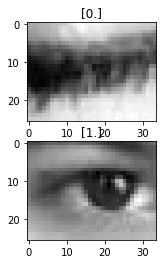

In [22]:
plt.subplot(2, 1, 1)
plt.title(str(y_train[0]))
plt.imshow(x_train[0].reshape((26, 34)), cmap='gray')
plt.subplot(2, 1, 2)
plt.title(str(y_val[4]))
plt.imshow(x_val[4].reshape((26, 34)), cmap='gray')

In [25]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=10,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2
)

val_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow(
    x=x_train, y=y_train,
    batch_size=32,
    shuffle=True
)

val_generator = val_datagen.flow(
    x=x_val, y=y_val,
    batch_size=32,
    shuffle=False
)

In [26]:
inputs = Input(shape=(26, 34, 1))

net = Conv2D(32, kernel_size=3, strides=1, padding='same', activation='relu')(inputs)
net = MaxPooling2D(pool_size=2)(net)

net = Conv2D(64, kernel_size=3, strides=1, padding='same', activation='relu')(net)
net = MaxPooling2D(pool_size=2)(net)

net = Conv2D(128, kernel_size=3, strides=1, padding='same', activation='relu')(net)
net = MaxPooling2D(pool_size=2)(net)

net = Flatten()(net)

net = Dense(512)(net)
net = Activation('relu')(net)
net = Dense(1)(net)
outputs = Activation('sigmoid')(net)

model = Model(inputs=inputs, outputs=outputs)

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['acc'])

model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 26, 34, 1)]       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 26, 34, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 17, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 13, 17, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 6, 8, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 6, 8, 128)         73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 3, 4, 128)         0     

In [27]:
start_time = datetime.datetime.now().strftime('%Y_%m_%d_%H_%M_%S')

model.fit_generator(
    train_generator, epochs=50, validation_data=val_generator,
    callbacks=[
        ModelCheckpoint('./gaze_tracking/trained_models/%s.h5' % (start_time), monitor='val_acc', save_best_only=True, mode='max', verbose=1),
        ReduceLROnPlateau(monitor='val_acc', factor=0.2, patience=10, verbose=1, mode='auto', min_lr=1e-05)
    ]
)

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/50
83/84 [============================>.] - ETA: 0s - loss: 0.4607 - acc: 0.7760
Epoch 00001: val_acc improved from -inf to 0.90572, saving model to ./gaze_tracking/trained_models/2021_07_12_12_27_22.h5
84/84 [==============================] - 4s 50ms/step - loss: 0.4582 - acc: 0.7779 - val_loss: 0.2407 - val_acc: 0.9057 - lr: 0.0010
Epoch 2/50
84/84 [==============================] - ETA: 0s - loss: 0.2075 - acc: 0.9203
Epoch 00002: val_acc improved from 0.90572 to 0.95286, saving model to ./gaze_tracking/trained_models/2021_07_12_12_27_22.h5
84/84 [==============================] - 4s 47ms/step - loss: 0.2075 - acc: 0.9203 - val_loss: 0.1258 - val_acc: 0.9529 - lr: 0.0010
Epoch 3/50
83/84 [============================>.] - ETA: 0s - loss: 0.1826 - acc: 0.9361
Epoch 00003: val_acc did not improve from 0.95286
84/84 [==============================] - 4s 45ms/step - loss: 0.1814 - acc: 0.9369 - val_loss:

84/84 [==============================] - ETA: 0s - loss: 0.0111 - acc: 0.9955
Epoch 00028: val_acc did not improve from 0.99327
84/84 [==============================] - 4s 43ms/step - loss: 0.0111 - acc: 0.9955 - val_loss: 0.0459 - val_acc: 0.9832 - lr: 2.0000e-04
Epoch 29/50
83/84 [============================>.] - ETA: 0s - loss: 0.0081 - acc: 0.9981
Epoch 00029: val_acc did not improve from 0.99327
84/84 [==============================] - 4s 42ms/step - loss: 0.0080 - acc: 0.9981 - val_loss: 0.0442 - val_acc: 0.9865 - lr: 2.0000e-04
Epoch 30/50
84/84 [==============================] - ETA: 0s - loss: 0.0093 - acc: 0.9974
Epoch 00030: val_acc did not improve from 0.99327
84/84 [==============================] - 4s 43ms/step - loss: 0.0093 - acc: 0.9974 - val_loss: 0.0405 - val_acc: 0.9865 - lr: 2.0000e-04
Epoch 31/50
83/84 [============================>.] - ETA: 0s - loss: 0.0057 - acc: 0.9985
Epoch 00031: val_acc did not improve from 0.99327
84/84 [==============================] - 

test acc: 0.9932659932659933


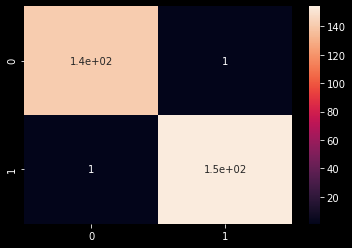

In [28]:
from sklearn.metrics import accuracy_score, confusion_matrix
import seaborn as sns

model = load_model('./gaze_tracking/trained_models/%s.h5' % (start_time))

y_pred = model.predict(x_val/255.)
y_pred_logical = (y_pred > 0.5).astype(np.int)

print ('test acc: %s' % accuracy_score(y_val, y_pred_logical))
cm = confusion_matrix(y_val, y_pred_logical)
sns.heatmap(cm, annot=True)

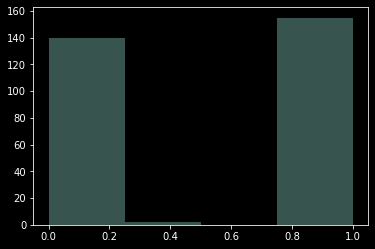

In [29]:
ax = sns.distplot(y_pred, kde=False)

# Preprocessing